In [2]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
import numpy as np
import wbdata
import datetime
import pycountry
import collections
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 499
pd.options.display.max_columns = 499
from tqdm import tqdm

In [14]:
G2000=nx.read_pajek("2000.net")
G2000=nx.Graph(G2000)
mask=pd.DataFrame.from_dict(dict(G2000.nodes(data=True)),orient='index').reset_index()

In [15]:
def data_olv(name):
    import2000=pd.read_csv(name).drop(columns=['SourceNomenCode',
                                                           'DestNomenCode','TradeFlow','ProductCode','Quantity',
                                                           'QuantityToken','NetWeight','Year'])
    import2000=import2000.rename(columns={"ReporterISO3":'source', 'PartnerISO3':'target', 'TradeValue':'weight'})
    import2000=import2000[import2000.target.isin(mask['index'])]
    import2000=import2000[import2000.source.isin(mask['index'])]
    import2000=import2000[import2000['source']!=import2000['target']]
    import2000=import2000.groupby(['source','target']).agg({'weight':'sum'}).reset_index()
    import2000=import2000.reset_index(drop=True)
    Y=nx.DiGraph()
    Y=nx.from_pandas_edgelist(import2000, 'source', 'target', ['weight'], nx.DiGraph())
    nx.set_node_attributes(Y, mask.set_index('index').to_dict('index'))
    return import2000, Y

edges2000, Y2000=data_olv('Import2000.csv')
edges2001, Y2001=data_olv('Import2001.csv')
edges2002, Y2002=data_olv('Import2002.csv')
edges2003, Y2003=data_olv('Import2003.csv')
edges2004, Y2004=data_olv('Import2004.csv')
edges2005, Y2005=data_olv('Import2005.csv')
edges2006, Y2006=data_olv('Import2006.csv')
edges2007, Y2007=data_olv('Import2007.csv')
edges2008, Y2008=data_olv('Import2008.csv')
edges2009, Y2009=data_olv('Import2009.csv')
edges2010, Y2010=data_olv('Import2010.csv')
edges2011, Y2011=data_olv('Import2011.csv')
edges2012, Y2012=data_olv('Import2012.csv')
edges2013, Y2013=data_olv('Import2013.csv')
edges2014, Y2014=data_olv('Import2014.csv')
edges2015, Y2015=data_olv('Import2015.csv')
edges2016, Y2016=data_olv('Import2016.csv')
edges2017, Y2017=data_olv('Import2017.csv')
#edges2018, Y2018=data_olv('Import2018.csv')

In [24]:
def degree_plot(ax,ay,G,cim):    
    df=pd.DataFrame.from_dict(dict(G.degree(weight='weight')),orient='index')
    #axes[ax,ay].plot(df[0], bins=10, color='b')
    bins = np.logspace(0,10.1, 50)
    widths = (bins[1:] - bins[:-1])
    hist = np.histogram(df[0], bins=bins)
    hist_norm = hist[0]/widths
    axes[ax,ay].set_title("Weighted degree histogram %s" %cim)
    axes[ax,ay].set_ylabel("Normalized_hist_values")
    axes[ax,ay].set_xlabel("Degree (weighted)")
    axes[ax,ay].plot(bins[:-1], hist_norm, "o")
    axes[ax,ay].set_xscale('log')
    axes[ax,ay].set_yscale('log')

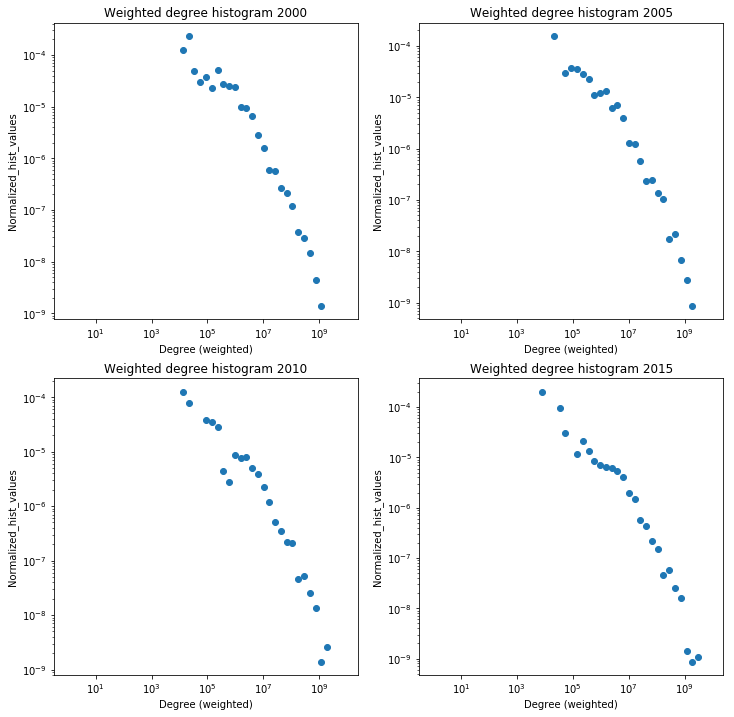

In [25]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

degree_plot(0,0,Y2000, "2000")
degree_plot(0,1,Y2005, "2005")
degree_plot(1,0,Y2010, "2010")
degree_plot(1,1,Y2015, "2015")

# Data generating for öko

In [19]:
nodess=pd.DataFrame(columns=['id','x','y','shape','year','Degree','Clustering_coef'])

def clustering_plot(ax,ay,G,cim, nodess):
    deg_df=pd.DataFrame(nx.degree(G, weight='weight'), columns=['Country','Degree']).set_index('Country')
    clus_df=pd.DataFrame.from_dict(nx.clustering(G, weight='weight'), orient='index', columns=['Clustering_coef'])
    deg_df=deg_df.merge(clus_df, left_index=True, right_index=True)
    node=nodess
    if cim==2000:
        nodes=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes['year']=cim
        node=nodes.merge(deg_df, left_index=True, right_index=True)
    else:
        nodes1=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes1['year']=cim
        nodes1=nodes1.merge(deg_df, left_index=True, right_index=True)
        frames=[node,nodes1]
        node=pd.concat(frames, axis=0)

    axes[ax,ay].set_title(cim)
    axes[ax,ay].set_ylabel("Clustering (weighted)")
    axes[ax,ay].set_xlabel("Degree (weighted)")
    
    
    axes[ax,ay].plot(node["Degree"],node["Clustering_coef"],"o")
    
    return node

In [263]:
#fig, axes = plt.subplots(2,2,figsize=(12,12))
#nodes=clustering_plot(0,0,Y2000, 2000, nodess)
#nodes=clustering_plot(0,1,Y2005, 2005, nodess)
#nodes=clustering_plot(1,0,Y2010, 2010, nodess)
#nodes=clustering_plot(1,1,Y2015, 2015, nodess)

In [31]:
def nodes_gen(G,cim, nodess):
    #deg_df=pd.DataFrame(nx.degree(G, weight='weight'), columns=['Country','Degree']).set_index('Country')
    #degree_cent=pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['degree_centrality'])
    #clus_df=pd.DataFrame.from_dict(nx.clustering(G, weight='weight'), orient='index', columns=['Clustering coef'])
    #neigh_df=pd.DataFrame.from_dict(nx.average_neighbor_degree(G, weight='weight'), orient='index', columns=['Average neighbor degree'])
    #between_df=pd.DataFrame.from_dict(nx.betweenness_centrality(G, weight='weight'), orient='index', columns=['Betweenness centrality'])
    #deg_df=deg_df.merge(degree_cent, left_index=True, right_index=True)
    #deg_df=deg_df.merge(between_df, left_index=True, right_index=True)
    #deg_df=deg_df.merge(neigh_df, left_index=True, right_index=True)
    #deg_df=deg_df.merge(clus_df, left_index=True, right_index=True)
    node=nodess
    if cim==2000:
        nodes=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes['year']=cim
        node=nodes#.merge(deg_df, left_index=True, right_index=True)
    else:
        nodes1=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes1['year']=cim
        #nodes1=nodes1.merge(deg_df, left_index=True, right_index=True)
        frames=[node,nodes1]
        node=pd.concat(frames, axis=0)
    return node

In [32]:
nodes=nodes_gen(Y2000, 2000, nodess)
nodes=nodes_gen(Y2001, 2001, nodes)
nodes=nodes_gen(Y2002, 2002, nodes)
nodes=nodes_gen(Y2003, 2003, nodes)
nodes=nodes_gen(Y2004, 2004, nodes)
nodes=nodes_gen(Y2005, 2005, nodes)
nodes=nodes_gen(Y2006, 2006, nodes)
nodes=nodes_gen(Y2007, 2007, nodes)
nodes=nodes_gen(Y2008, 2008, nodes)
nodes=nodes_gen(Y2009, 2009, nodes)
nodes=nodes_gen(Y2010, 2010, nodes)
nodes=nodes_gen(Y2011, 2011, nodes)
nodes=nodes_gen(Y2012, 2012, nodes)
nodes=nodes_gen(Y2013, 2013, nodes)
nodes=nodes_gen(Y2014, 2014, nodes)
nodes=nodes_gen(Y2015, 2015, nodes)
nodes=nodes_gen(Y2016, 2016, nodes)
nodes=nodes_gen(Y2017, 2017, nodes)
#nodes=nodes_gen(Y2018, 2018, nodes)
input_countries=nodes.index
input_countries=pd.DataFrame(input_countries, columns=["Countries"])

iso2=[]
iso3=[]
count=[]
countries = {}
for country in pycountry.countries:
    iso2.append(country.alpha_2)
    iso3.append(country.alpha_3)
    count.append(country.name)
    
countries=pd.DataFrame(iso3,iso2, columns=["iso3"]).reset_index()
countries["name"]=count
nodes=nodes.merge(countries,left_index=True, right_on="iso3",how='left')


gross2000=edges2000.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2001=edges2001.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2002=edges2002.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2003=edges2003.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2004=edges2004.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2005=edges2005.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2006=edges2006.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2007=edges2007.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2008=edges2008.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2009=edges2009.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2010=edges2010.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2011=edges2011.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2012=edges2012.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2013=edges2013.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2014=edges2014.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2015=edges2015.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2016=edges2016.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2017=edges2017.groupby('source').sum().rename(columns={'weight':'gross_import'})

#gross2018=edges2018.groupby('source').sum()

imp00=nodes.merge(gross2000, left_on='iso3', right_index=True, how='left')
imp00=imp00[imp00['year']==2000]
imp01=nodes.merge(gross2001, left_on='iso3', right_index=True, how='left')
imp01=imp01[imp01['year']==2001]
imp02=nodes.merge(gross2002, left_on='iso3', right_index=True, how='left')
imp02=imp02[imp02['year']==2002]
imp03=nodes.merge(gross2003, left_on='iso3', right_index=True, how='left')
imp03=imp03[imp03['year']==2003]
imp04=nodes.merge(gross2004, left_on='iso3', right_index=True, how='left')
imp04=imp04[imp04['year']==2004]
imp05=nodes.merge(gross2005, left_on='iso3', right_index=True, how='left')
imp05=imp05[imp05['year']==2005]
imp06=nodes.merge(gross2006, left_on='iso3', right_index=True, how='left')
imp06=imp06[imp06['year']==2006]
imp07=nodes.merge(gross2007, left_on='iso3', right_index=True, how='left')
imp07=imp07[imp07['year']==2007]
imp08=nodes.merge(gross2008, left_on='iso3', right_index=True, how='left')
imp08=imp08[imp08['year']==2008]
imp09=nodes.merge(gross2009, left_on='iso3', right_index=True, how='left')
imp09=imp09[imp09['year']==2009]
imp10=nodes.merge(gross2010, left_on='iso3', right_index=True, how='left')
imp10=imp10[imp10['year']==2010]
imp11=nodes.merge(gross2011, left_on='iso3', right_index=True, how='left')
imp11=imp11[imp11['year']==2011]
imp12=nodes.merge(gross2012, left_on='iso3', right_index=True, how='left')
imp12=imp12[imp12['year']==2012]
imp13=nodes.merge(gross2013, left_on='iso3', right_index=True, how='left')
imp13=imp13[imp13['year']==2013]
imp14=nodes.merge(gross2014, left_on='iso3', right_index=True, how='left')
imp14=imp14[imp14['year']==2014]
imp15=nodes.merge(gross2015, left_on='iso3', right_index=True, how='left')
imp15=imp15[imp15['year']==2015]
imp16=nodes.merge(gross2016, left_on='iso3', right_index=True, how='left')
imp16=imp16[imp16['year']==2016]
imp17=nodes.merge(gross2017, left_on='iso3', right_index=True, how='left')
imp17=imp17[imp17['year']==2017]

nodes=pd.concat([imp00,imp01,imp02,imp03,imp04,imp05,imp06,imp07,imp08,
                 imp09,imp10,imp11,imp12,imp13,imp14,imp15,imp16,imp17], axis=0)

In [34]:
len(Y2000.nodes)

98

In [21]:
missing=nodes[nodes['gross_import'].isna()]['iso3'].unique()
mask2=pd.DataFrame([*missing],columns=['index'])
mask2

,index
0,ARE
1,BIH
2,HTI
3,AGO
4,COG
5,DOM
6,FJI
7,GTM
8,LAO
9,PAK


In [28]:
mask=mask[~mask['index'].isin(mask2['index'])]
mask

,index,id,x,y,shape
1,ALB,2,0.5560,0.7286,0.5000
3,ARG,4,0.3233,0.2866,0.5000
4,ARM,5,0.6251,0.7226,0.5000
6,AUS,7,0.8716,0.3596,0.5000
7,AUT,8,0.5404,0.7640,0.5000
8,AZE,9,0.6322,0.7230,0.5000
9,BDI,10,0.5831,0.4813,0.5000
10,BEL,11,0.5124,0.7806,0.5000
11,BEN,12,0.5064,0.5517,0.5000
14,BGR,15,0.5708,0.7374,0.5000


In [159]:
def data_olv(name):
    import2000=pd.read_csv(name).drop(columns=['SourceNomenCode',
                                                           'DestNomenCode','TradeFlow','ProductCode','Quantity',
                                                           'QuantityToken','NetWeight','Year'])
    import2000=import2000.rename(columns={"ReporterISO3":'source', 'PartnerISO3':'target', 'TradeValue':'weight'})
    import2000=import2000[import2000.target.isin(mask['index'])]
    import2000=import2000[import2000.source.isin(mask['index'])]
    import2000=import2000[import2000['source']!=import2000['target']]
    import2000=import2000.groupby(['source','target']).agg({'weight':'sum'}).reset_index()
    import2000['weight']=import2000['weight'].astype(int)
    import2000=import2000.reset_index(drop=True)
    Y=nx.DiGraph()
    Y=nx.from_pandas_edgelist(import2000, 'source', 'target', ['weight'], nx.DiGraph())
    nx.set_node_attributes(Y, mask.set_index('index').to_dict('index'))
    return import2000, Y

edges2000, Y2000=data_olv('Import2000.csv')
edges2001, Y2001=data_olv('Import2001.csv')
edges2002, Y2002=data_olv('Import2002.csv')
edges2003, Y2003=data_olv('Import2003.csv')
edges2004, Y2004=data_olv('Import2004.csv')
edges2005, Y2005=data_olv('Import2005.csv')
edges2006, Y2006=data_olv('Import2006.csv')
edges2007, Y2007=data_olv('Import2007.csv')
edges2008, Y2008=data_olv('Import2008.csv')
edges2009, Y2009=data_olv('Import2009.csv')
edges2010, Y2010=data_olv('Import2010.csv')
edges2011, Y2011=data_olv('Import2011.csv')
edges2012, Y2012=data_olv('Import2012.csv')
edges2013, Y2013=data_olv('Import2013.csv')
edges2014, Y2014=data_olv('Import2014.csv')
edges2015, Y2015=data_olv('Import2015.csv')
edges2016, Y2016=data_olv('Import2016.csv')
edges2017, Y2017=data_olv('Import2017.csv')
#edges2018, Y2018=data_olv('Import2018.csv')

In [313]:
def nodes_gen(G,cim, nodess):
    deg_df=pd.DataFrame(nx.degree(G, weight='weight'), columns=['Country','Degree_strength']).set_index('Country')
    deg=pd.DataFrame(nx.degree(nx.Graph(G)), columns=['Country','Degree']).set_index('Country')
    in_degree_cent=pd.DataFrame.from_dict(nx.in_degree_centrality(G), orient='index', columns=['in_degree_centrality'])
    out_degree_cent=pd.DataFrame.from_dict(nx.out_degree_centrality(G), orient='index', columns=['out_degree_centrality'])
    clus_df=pd.DataFrame.from_dict(nx.clustering(G, weight='weight'), orient='index', columns=['Clustering_coef'])
    neigh_df=pd.DataFrame.from_dict(nx.average_neighbor_degree(G, weight='weight'), orient='index', columns=['Average neighbor degree'])
    between_df=pd.DataFrame.from_dict(nx.betweenness_centrality(G, weight='weight'), orient='index', columns=['Betweenness centrality'])
    deg_df=deg_df.merge(deg, left_index=True, right_index=True)
    deg_df=deg_df.merge(in_degree_cent, left_index=True, right_index=True)
    deg_df=deg_df.merge(out_degree_cent, left_index=True, right_index=True)
    deg_df=deg_df.merge(between_df, left_index=True, right_index=True)
    deg_df=deg_df.merge(neigh_df, left_index=True, right_index=True)
    deg_df=deg_df.merge(clus_df, left_index=True, right_index=True)
    node=nodess
    if cim==2000:
        nodes=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes['year']=cim
        node=nodes.merge(deg_df, left_index=True, right_index=True)
    else:
        nodes1=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
        nodes1['year']=cim
        nodes1=nodes1.merge(deg_df, left_index=True, right_index=True)
        frames=[node,nodes1]
        node=pd.concat(frames, axis=0)
    return node

nodes=nodes_gen(Y2000, 2000, nodess)
nodes=nodes_gen(Y2001, 2001, nodes)
nodes=nodes_gen(Y2002, 2002, nodes)
nodes=nodes_gen(Y2003, 2003, nodes)
nodes=nodes_gen(Y2004, 2004, nodes)
nodes=nodes_gen(Y2005, 2005, nodes)
nodes=nodes_gen(Y2006, 2006, nodes)
nodes=nodes_gen(Y2007, 2007, nodes)
nodes=nodes_gen(Y2008, 2008, nodes)
nodes=nodes_gen(Y2009, 2009, nodes)
nodes=nodes_gen(Y2010, 2010, nodes)
nodes=nodes_gen(Y2011, 2011, nodes)
nodes=nodes_gen(Y2012, 2012, nodes)
nodes=nodes_gen(Y2013, 2013, nodes)
nodes=nodes_gen(Y2014, 2014, nodes)
nodes=nodes_gen(Y2015, 2015, nodes)
nodes=nodes_gen(Y2016, 2016, nodes)
nodes=nodes_gen(Y2017, 2017, nodes)
#nodes=nodes_gen(Y2018, 2018, nodes)
input_countries=nodes.index
input_countries=pd.DataFrame(input_countries, columns=["Countries"])

iso2=[]
iso3=[]
count=[]
countries = {}
for country in pycountry.countries:
    iso2.append(country.alpha_2)
    iso3.append(country.alpha_3)
    count.append(country.name)
    
countries=pd.DataFrame(iso3,iso2, columns=["iso3"]).reset_index()
countries["name"]=count
nodes=nodes.merge(countries,left_index=True, right_on="iso3",how='left')

gross2000=edges2000.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2001=edges2001.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2002=edges2002.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2003=edges2003.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2004=edges2004.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2005=edges2005.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2006=edges2006.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2007=edges2007.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2008=edges2008.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2009=edges2009.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2010=edges2010.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2011=edges2011.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2012=edges2012.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2013=edges2013.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2014=edges2014.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2015=edges2015.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2016=edges2016.groupby('source').sum().rename(columns={'weight':'gross_import'})
gross2017=edges2017.groupby('source').sum().rename(columns={'weight':'gross_import'})

#gross2018=edges2018.groupby('source').sum()

imp00=nodes.merge(gross2000, left_on='iso3', right_index=True, how='left')
imp00=imp00[imp00['year']==2000]
imp01=nodes.merge(gross2001, left_on='iso3', right_index=True, how='left')
imp01=imp01[imp01['year']==2001]
imp02=nodes.merge(gross2002, left_on='iso3', right_index=True, how='left')
imp02=imp02[imp02['year']==2002]
imp03=nodes.merge(gross2003, left_on='iso3', right_index=True, how='left')
imp03=imp03[imp03['year']==2003]
imp04=nodes.merge(gross2004, left_on='iso3', right_index=True, how='left')
imp04=imp04[imp04['year']==2004]
imp05=nodes.merge(gross2005, left_on='iso3', right_index=True, how='left')
imp05=imp05[imp05['year']==2005]
imp06=nodes.merge(gross2006, left_on='iso3', right_index=True, how='left')
imp06=imp06[imp06['year']==2006]
imp07=nodes.merge(gross2007, left_on='iso3', right_index=True, how='left')
imp07=imp07[imp07['year']==2007]
imp08=nodes.merge(gross2008, left_on='iso3', right_index=True, how='left')
imp08=imp08[imp08['year']==2008]
imp09=nodes.merge(gross2009, left_on='iso3', right_index=True, how='left')
imp09=imp09[imp09['year']==2009]
imp10=nodes.merge(gross2010, left_on='iso3', right_index=True, how='left')
imp10=imp10[imp10['year']==2010]
imp11=nodes.merge(gross2011, left_on='iso3', right_index=True, how='left')
imp11=imp11[imp11['year']==2011]
imp12=nodes.merge(gross2012, left_on='iso3', right_index=True, how='left')
imp12=imp12[imp12['year']==2012]
imp13=nodes.merge(gross2013, left_on='iso3', right_index=True, how='left')
imp13=imp13[imp13['year']==2013]
imp14=nodes.merge(gross2014, left_on='iso3', right_index=True, how='left')
imp14=imp14[imp14['year']==2014]
imp15=nodes.merge(gross2015, left_on='iso3', right_index=True, how='left')
imp15=imp15[imp15['year']==2015]
imp16=nodes.merge(gross2016, left_on='iso3', right_index=True, how='left')
imp16=imp16[imp16['year']==2016]
imp17=nodes.merge(gross2017, left_on='iso3', right_index=True, how='left')
imp17=imp17[imp17['year']==2017]

nodes=pd.concat([imp00,imp01,imp02,imp03,imp04,imp05,imp06,imp07,imp08,
                 imp09,imp10,imp11,imp12,imp13,imp14,imp15,imp16,imp17], axis=0)

nodes['Trade_bn_usd']=nodes['Degree']/1000000
nodes['Import_bn_usd']=nodes['gross_import']/1000000
nodes['Export_bn_usd']=(nodes['Trade_bn_usd']-nodes['Import_bn_usd'])

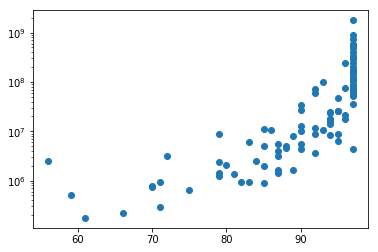

In [314]:
def wbadat(times, tab, indicat, name):
    indicator={indicat:name}
    tab2=pd.DataFrame()
    for i in tqdm(times):
        data_date = (datetime.datetime(i, 1, 1))
        try:
            population=wbdata.get_data(indicat, data_date=data_date)
            population=pd.DataFrame(population).drop(columns=['decimal','indicator','date'])
            population['index']=[f['id'] for f in population['country']]
            population=population.drop(columns=["country"])
            population=population.dropna()
            population['value']=round(population['value'].astype(float),2)
            population=population.rename(columns={"value":name})
            
            tab1=tab.merge(population, left_on=["index"], right_on=["index"], how="left")
            
            tab1=tab1[tab1['year']==i]
            if i==2000:
                tab2=tab1
            else:
                frames=[tab1,tab2]
                tab2=pd.concat(frames, axis=0)

        except:
            'foo'        
    return tab2

dates=list(range(2000,2018))


nodes=wbadat(dates, nodes,'NY.GDP.PCAP.KD', "constantGDP_percapita")
#nodes=wbadat(dates, nodes,'CC.PER.RNK', "corruption_index")
nodes=wbadat(dates, nodes,'SI.POV.GINI', "GINI")
nodes=wbadat(dates, nodes,'NY.GDP.PCAP.KD.ZG', "per_capita_GDP_growth")
nodes=wbadat(dates, nodes,'TG.VAL.TOTL.GD.ZS', "Trade_GDP")
nodes=wbadat(dates, nodes,'SH.XPD.GHED.GD.ZS', "gov_expend_on_health_GDP")
nodes=wbadat(dates, nodes,'BX.KLT.DINV.WD.GD.ZS', "FDI_inflow_GDP")
nodes=wbadat(dates, nodes,'SE.XPD.TOTL.GD.ZS', "gov_expend_on_educ_GDP")
nodes=wbadat(dates, nodes,'SE.SEC.ENRR', "secondary_educ_gross_enrollment")
nodes=wbadat(dates, nodes,'NY.GDP.TOTL.RT.ZS', "natural_resource_rents_GDP")
nodes=wbadat(dates, nodes,'TX.VAL.ICTG.ZS.UN', "ICT_goods_export")
nodes=wbadat(dates, nodes,'GB.XPD.RSDV.GD.ZS', "RD_expenditures_GDP")
nodes=wbadat(dates, nodes,'FS.AST.PRVT.GD.ZS', "domestic_credit_to_private_sector_GDP")
nodes=wbadat(dates, nodes,'SP.POP.TOTL', "Population")
nodes=wbadat(dates, nodes,'SP.POP.GROW', "Population_growth")
nodes=wbadat(dates, nodes,'SP.DYN.LE00.IN', "life_expectancy")

development=pd.read_excel('UNSD — Methodology.xlsx')
development=development.drop(columns=['Global Code','Global Name',
                                      'Region Code', 'Sub-region Code', 'Intermediate Region Code',
                                      'Intermediate Region Name','Country or Area', 'M49 Code'])
nodes=nodes.merge(development, left_on='iso3', right_on='ISO-alpha3 Code',
                  how='left', copy=False).drop(columns=['ISO-alpha3 Code'])

nodes=nodes.sort_values(['year','name'])
nodes['log_Gdp']=nodes['constantGDP_percapita'].apply(np.log)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 32.86it/s]


In [315]:
nodes1=wbadat(dates, nodes,'CC.PER.RNK', "corruption_index")

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 33.72it/s]


In [316]:
time=list(range(1995,2000))
moving_df=pd.DataFrame()
def moving(tab,indicat,name,times):
    for i in tqdm(times):
        data_date = (datetime.datetime(i, 1, 1))
        try:
            population=wbdata.get_data(indicat, data_date=data_date)
            population=pd.DataFrame(population).drop(columns=['decimal','indicator','date'])
            population['index']=[f['id'] for f in population['country']]
            population=population.drop(columns=["country"])
            population=population.dropna()
            population['value']=round(population['value'].astype(float),2)
            population=population.rename(columns={"value":name})
            population['year']=i
            tab1=population
            if i == 1995:
                tab2=tab1
            else:
                frames=[tab1,tab2]
                tab2=pd.concat(frames, axis=0)
        except:
            'foo'
    return tab2

pop=moving(moving_df,'SP.POP.TOTL', 'Population',time)
pop_gr=moving(moving_df,'SP.POP.GROW', 'Population_growth',time)
gdp_grth=moving(moving_df,'NY.GDP.PCAP.KD.ZG', "per_capita_GDP_growth",time)
gdp=moving(moving_df,'NY.GDP.PCAP.KD', "constantGDP_percapita",time)
gdp['log_Gdp']=gdp['constantGDP_percapita'].apply(np.log)
trade_gdp=moving(moving_df,'TG.VAL.TOTL.GD.ZS', "Trade_GDP", time)
lf_exp=moving(moving_df,'SP.DYN.LE00.IN', "life_expectancy",time)



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.54it/s]


In [323]:
new_df=pop.merge(pop_gr).merge(gdp_grth).merge(gdp).drop(columns='constantGDP_percapita'
                                      ).merge(trade_gdp).merge(lf_exp)

new_df=new_df.merge(nodes[nodes.columns[12:15]].drop_duplicates(),left_on='index',right_on='index', how='left')
new_df=new_df[new_df.iso3.isin(mask['index'])]

In [324]:
nodes2=nodes.merge(nodes1, how='outer')
nodes3=pd.concat([nodes2,new_df]).sort_values(['name','year'])
nodes3=nodes3.merge(nodes_herf[['index','year','herfindahl_index']], 
             left_on=['index','year'], right_on=['index','year'], how='left')
nodes3

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Average neighbor degree,Betweenness centrality,Clustering_coef,Degree,Degree_strength,Developed / Developing Countries,Export_bn_usd,FDI_inflow_GDP,GINI,ICT_goods_export,Import_bn_usd,Land Locked Developing Countries (LLDC),Least Developed Countries (LDC),Population,Population_growth,RD_expenditures_GDP,Region Name,Small Island Developing States (SIDS),Sub-region Name,Trade_GDP,Trade_bn_usd,WTO,constantGDP_percapita,corruption_index,domestic_credit_to_private_sector_GDP,gov_expend_on_educ_GDP,gov_expend_on_health_GDP,gross_import,id,in_degree_centrality,index,iso3,life_expectancy,log_Gdp,name,natural_resource_rents_GDP,out_degree_centrality,per_capita_GDP_growth,secondary_educ_gross_enrollment,shape,x,y,year,herfindahl_index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3187784.0,-0.62,NaN,NaN,NaN,NaN,38.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,72.20,7.440317,Albania,NaN,NaN,14.02,NaN,NaN,NaN,NaN,1995,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3168033.0,-0.62,NaN,NaN,NaN,NaN,35.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,72.50,7.533624,Albania,NaN,NaN,9.78,NaN,NaN,NaN,NaN,1996,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3148281.0,-0.63,NaN,NaN,NaN,NaN,34.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,72.84,7.424243,Albania,NaN,NaN,-10.36,NaN,NaN,NaN,NaN,1997,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128530.0,-0.63,NaN,NaN,NaN,NaN,40.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,73.21,7.515154,Albania,NaN,NaN,9.52,NaN,NaN,NaN,NaN,1998,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3108778.0,-0.63,NaN,NaN,NaN,NaN,46.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,73.59,7.642730,Albania,NaN,NaN,13.61,NaN,NaN,NaN,NaN,1999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,96.626278,0.0,0.001344,97.0,246768738.0,0.0,-110.815404,5.20,NaN,24.54,110.815501,0.0,0.0,90753472.0,1.05,0.37,Asia,0.0,South-eastern Asia,154.22,0.000097,1.0,1505.81,38.86,96.80,5.65,2.98,110815501.0,157,1.0,VN,VNM,75.01,7.317086,Viet Nam,6.48,0.835052,4.32,NaN,0.5000,0.8008,0.5781,2013,580.364703
2234,96.560733,0.0,0.001252,97.0,279346635.0,0.0,-124.198535,4.94,34.8,23.97,124.198632,0.0,0.0,91714595.0,1.05,NaN,Asia,0.0,South-eastern Asia,160.07,0.000097,1.0,1579.19,40.87,100.30,NaN,2.43,124198632.0,157,1.0,VN,VNM,75.06,7.364667,Viet Nam,5.78,0.886598,4.87,NaN,0.5000,0.8008,0.5781,2014,494.819313
2235,96.516042,0.0,0.001296,97.0,316955089.0,0.0,-140.921779,6.11,NaN,29.37,140.921876,0.0,0.0,92677076.0,1.04,0.44,Asia,0.0,South-eastern Asia,169.57,0.000097,1.0,1667.17,41.83,111.93,NaN,2.36,140921876.0,157,1.0,VN,VNM,75.11,7.418883,Viet Nam,3.28,0.845361,5.57,NaN,0.5000,0.8008,0.5781,2015,325.391325
2236,96.426908,0.0,0.001363,97.0,342415814.0,0.0,-149.717683,6.14,35.3,31.24,149.717780,0.0,0.0,93638724.0,1.03,NaN,Asia,0.0,South-eastern Asia,171.18,0.000097,1.0,1752.53,37.50,123.81,4.34,2.68,149717780.0,157,1.0,VN,VNM,75.17,7.468816,Viet Nam,2.62,0.886598,5.12,NaN,0.5000,0.8008,0.5781,2016,256.203261


In [325]:
nodes3['clus_MA'] = nodes3.loc[:,'Clustering_coef'].rolling(window=5).mean().shift(1)
nodes3['FDI_MA'] = nodes3.loc[:,'FDI_inflow_GDP'].rolling(window=5).mean().shift(1)
nodes3['Pop_MA'] = nodes3.loc[:,'Population'].rolling(window=5).mean().shift(1)
nodes3['Pop_gr_MA'] = nodes3.loc[:,'Population_growth'].rolling(window=5).mean().shift(1)
nodes3['Trade_MA'] = nodes3.loc[:,'Trade_GDP'].rolling(window=5).mean().shift(1)
nodes3['Trade_bn_usd_MA'] = nodes3.loc[:,'Trade_bn_usd'].rolling(window=5).mean().shift(1)
nodes3['corup_MA'] = nodes3.loc[:,'corruption_index'].rolling(window=5).mean().shift(1)
nodes3['life_exp_MA'] = nodes3.loc[:,'life_expectancy'].rolling(window=5).mean().shift(1)
nodes3['gdp_MA'] = nodes3.loc[:,'log_Gdp'].rolling(window=5).mean().shift(1)
nodes3['gdp_gr_MA'] = nodes3.loc[:,'per_capita_GDP_growth'].rolling(window=5).mean().shift(1)
nodes3['herf_MA'] = nodes3.loc[:,'herfindahl_index'].rolling(window=5).mean().shift(1)


In [273]:
#nodes4=nodes3[nodes3['year']>1999]

In [152]:
#nodes3.to_csv('nodes3_data.csv', index=False)
#nodes4.to_csv('final_data.csv', index=False)
#nodes1.to_csv('data_corruption.csv', index=False)
#nodes.to_csv('data.csv',index=False)
#new_df.to_csv('new_df.csv',index=False)

In [327]:
nodes.to_csv('network_elemzes.csv', index=False)

In [328]:
network_el=pd.read_csv('network_elemzes.csv')
network_el

,id,x,y,shape,year,Degree_strength,Degree,in_degree_centrality,out_degree_centrality,Betweenness centrality,Average neighbor degree,Clustering_coef,index,iso3,name,gross_import,Trade_bn_usd,Import_bn_usd,Export_bn_usd,constantGDP_percapita,GINI,per_capita_GDP_growth,Trade_GDP,gov_expend_on_health_GDP,FDI_inflow_GDP,gov_expend_on_educ_GDP,secondary_educ_gross_enrollment,natural_resource_rents_GDP,ICT_goods_export,RD_expenditures_GDP,domestic_credit_to_private_sector_GDP,Population,Population_growth,life_expectancy,Region Name,Sub-region Name,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,WTO,log_Gdp
0,2,0.5560,0.7286,0.5,2000,1352823,81,0.711340,0.690722,0.072469,95.567686,0.000045,AL,ALB,Albania,1.067358e+06,0.000081,1.067358,-1.067277,2244.63,NaN,7.63,38.85,2.72,4.11,3.43,71.08,1.09,0.39,NaN,4.95,3089027.0,-0.64,73.96,Europe,Southern Europe,0,0,0,1.0,1,7.716296
1,44,0.5046,0.6557,0.5,2000,26886980,90,0.721649,0.907216,0.231627,95.660709,0.000422,DZ,DZA,Algeria,9.004983e+06,0.000090,9.004983,-9.004893,3557.58,NaN,2.40,56.95,2.51,0.51,NaN,65.12,24.31,0.01,NaN,5.97,31042235.0,1.36,70.64,Africa,Northern Africa,0,0,0,0.0,0,8.176836
2,4,0.3233,0.2866,0.5,2000,48031655,95,0.958763,0.917526,0.000000,93.937617,0.000538,AR,ARG,Argentina,2.382710e+07,0.000095,23.827104,-23.827009,8224.11,51.1,-1.87,18.12,4.63,3.67,4.58,95.94,2.42,0.36,0.44,23.89,36870787.0,1.10,73.58,Americas,Latin America and the Caribbean,0,0,0,0.0,1,9.014825
3,5,0.6251,0.7226,0.5,2000,916316,71,0.639175,0.618557,0.097948,94.331486,0.000052,AM,ARM,Armenia,6.956430e+05,0.000071,0.695643,-0.695572,1404.32,NaN,6.57,61.52,0.95,5.45,2.77,92.15,0.36,0.36,0.19,9.95,3069591.0,-0.63,71.41,Asia,Western Asia,0,1,0,0.0,1,7.247308
4,7,0.8716,0.3596,0.5,2000,121525721,97,0.979381,0.989691,0.000000,95.171986,0.000977,AU,AUS,Australia,6.360372e+07,0.000097,63.603719,-63.603622,44334.39,NaN,2.70,32.61,5.21,3.59,4.89,NaN,3.26,2.85,1.58,87.74,19153000.0,1.19,79.23,Oceania,Australia and New Zealand,0,0,0,1.0,1,10.699516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,152,0.5866,0.7688,0.5,2017,90698726,97,0.979381,0.979381,0.000000,96.279227,0.000546,UA,UKR,Ukraine,4.659894e+07,0.000097,46.598943,-46.598846,2994.52,26.0,2.92,82.78,3.08,2.52,5.41,NaN,4.00,0.93,0.45,38.27,44831135.0,-0.39,71.78,Europe,Eastern Europe,0,0,0,1.0,1,8.004539
1760,55,0.4905,0.8077,0.5,2017,965531044,97,1.000000,1.000000,0.000000,96.662212,0.002709,GB,GBR,United Kingdom,5.951660e+08,0.000097,595.166034,-595.165937,43010.71,NaN,1.20,40.58,7.65,4.55,NaN,125.85,0.44,4.25,1.66,133.97,66058859.0,0.68,81.26,Europe,Northern Europe,0,0,0,1.0,0,10.669204
1761,154,0.2341,0.7061,0.5,2017,3489675976,97,1.000000,1.000000,0.000000,96.357499,0.005472,US,USA,United States,2.148229e+09,0.000097,2148.228731,-2148.228634,53382.76,NaN,1.57,20.30,8.56,1.82,NaN,98.95,0.47,9.49,2.79,190.58,324985539.0,0.63,78.54,Americas,Northern America,0,0,0,1.0,0,10.885243
1762,153,0.3451,0.3193,0.5,2017,17604339,94,0.948454,0.896907,0.000000,96.169188,0.000177,UY,URY,Uruguay,8.051036e+06,0.000094,8.051036,-8.050942,14437.38,39.5,2.22,28.94,6.58,4.70,4.84,120.22,1.65,0.13,0.48,26.13,3436646.0,0.36,77.63,Americas,Latin America and the Caribbean,0,0,0,0.0,1,9.577576


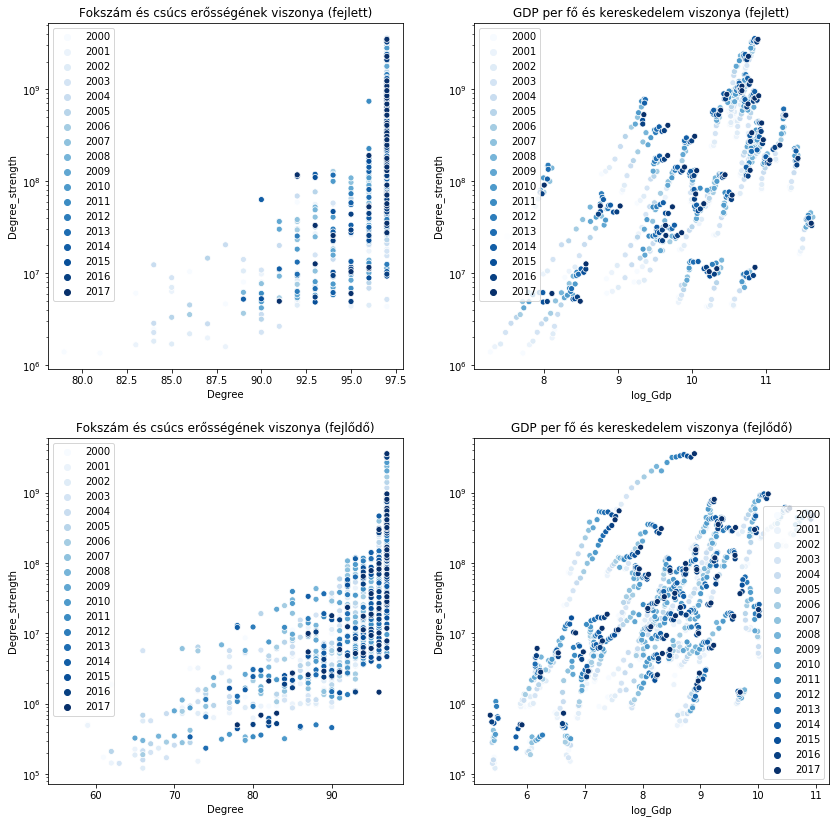

In [396]:
fix, axes=plt.subplots(2,2,figsize=(14,14))
def plotf(ax,ay,X,Y, cim, legend, network_el,develop, logx='foo', logy='bar'):
    if develop==1:
        network=network_el[network_el['Developed / Developing Countries']==1]
    else:
        network=network_el[network_el['Developed / Developing Countries']==0]
    sns.scatterplot(network[X], network[Y], ax=axes[ax,ay], hue=network[legend].values, palette="Blues",legend='full')
    axes[ax,ay].set_title(cim)
    axes[ax,ay].set_ylabel(Y)
    axes[ax,ay].set_xlabel(X)
    if logx==1:
        axes[ax,ay].set_xscale("log")
    if logy==1:
        axes[ax,ay].set_yscale("log")
    return

plotf(0,0,'Degree','Degree_strength','Fokszám és csúcs erősségének viszonya (fejlett)', 'year',network_el,1, logy=1)
plotf(0,1,'log_Gdp','Degree_strength','GDP per fő és kereskedelem viszonya (fejlett)', 'year',network_el,1, logy=1)
plotf(1,0,'Degree','Degree_strength','Fokszám és csúcs erősségének viszonya (fejlődő)', 'year',network_el,0, logy=1)
plotf(1,1,'log_Gdp','Degree_strength','GDP per fő és kereskedelem viszonya (fejlődő)', 'year',network_el,0, logy=1)

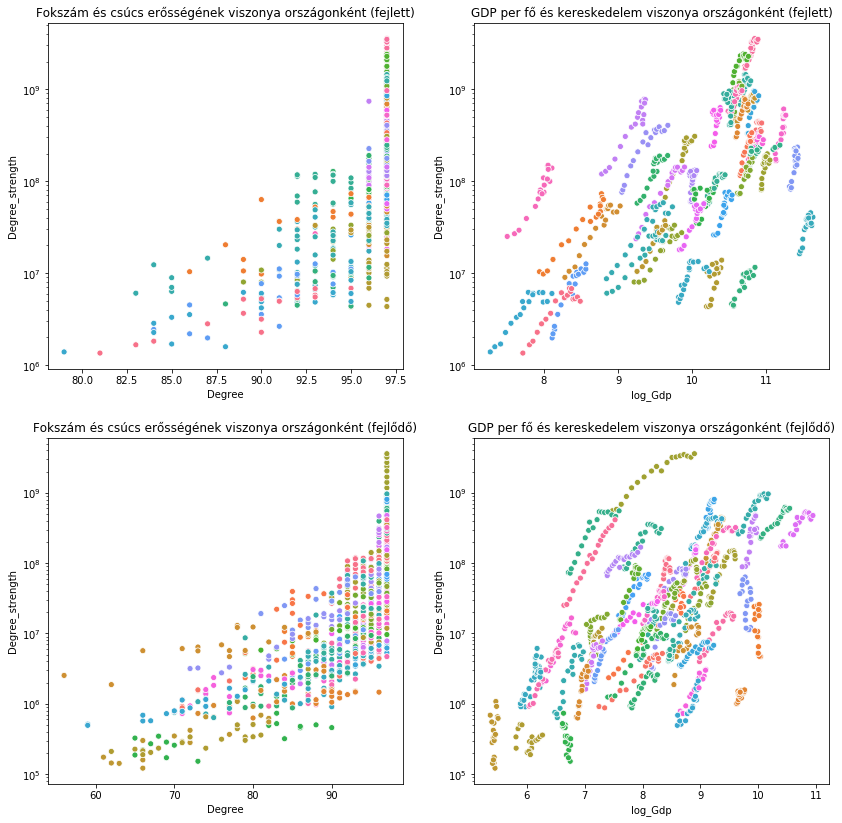

In [399]:
fix, axes=plt.subplots(2,2,figsize=(14,14))
def plotf2(ax,ay,X,Y, cim, legend, network_el,develop, logx='foo', logy='bar'):
    if develop==1:
        network=network_el[network_el['Developed / Developing Countries']==1]
    else:
        network=network_el[network_el['Developed / Developing Countries']==0]
    sns.scatterplot(network[X], network[Y], ax=axes[ax,ay], hue=network[legend].values, palette="husl",legend=False)
    axes[ax,ay].set_title(cim)
    axes[ax,ay].set_ylabel(Y)
    axes[ax,ay].set_xlabel(X)
    if logx==1:
        axes[ax,ay].set_xscale("log")
    if logy==1:
        axes[ax,ay].set_yscale("log")
    return

plotf2(0,0,'Degree','Degree_strength','Fokszám és csúcs erősségének viszonya országonként (fejlett)',
       'name', network_el,1 ,logy=1)
plotf2(0,1,'log_Gdp','Degree_strength','GDP per fő és kereskedelem viszonya országonként (fejlett)',
       'name', network_el,1, logy=1)
plotf2(1,0,'Degree','Degree_strength','Fokszám és csúcs erősségének viszonya országonként (fejlődő)',
       'name', network_el,0 ,logy=1)
plotf2(1,1,'log_Gdp','Degree_strength','GDP per fő és kereskedelem viszonya országonként (fejlődő)',
       'name', network_el,0, logy=1)

# Global properties

In [289]:
networks=[Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,
          Y2014,Y2015,Y2016,Y2017]
years=list(range(2000,2018))

def global_properties(G, years):
    global_df=pd.DataFrame()
    for i in range(len(years)):
        data={"year":years[i], "N": [len(nx.nodes(G[i]))], "L": [len(nx.edges(G[i]))], "<k>": [nx.ave]
              "node connectivity":[nx.node_connectivity(G[i])],
              "density": [nx.density(G[i])], "assortativity": [nx.degree_pearson_correlation_coefficient(G[i])]}
        global_df=global_df.append(pd.DataFrame(data))
    return global_df.reset_index(drop=True)


glob_df=global_properties(networks,years)
glob_df

,year,N,L,node connectivity,density,assortativity
0,2000,98,8192,37,0.861772,-0.179819
1,2001,98,8304,37,0.873554,-0.169615
2,2002,98,8339,41,0.877235,-0.175633
3,2003,98,8369,43,0.880391,-0.166296
4,2004,98,8443,48,0.888176,-0.166377
5,2005,98,8464,51,0.890385,-0.168847
6,2006,98,8532,29,0.897538,-0.154892
7,2007,98,8587,46,0.903324,-0.153937
8,2008,98,8681,47,0.913213,-0.147967
9,2009,98,8652,45,0.910162,-0.153126


In [400]:
8192/(98*97)

0.8617715127288028

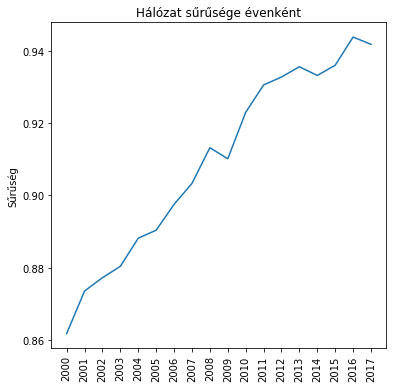

In [222]:
fig, axes = plt.subplots(figsize=(6,6))
axes.plot(glob_df['year'],glob_df['density'])
axes.set_xticks(glob_df['year'])
axes.set_title("Hálózat sűrűsége évenként")
axes.set_ylabel("Sűrűség")
axes.set_xticklabels(glob_df['year'], rotation='vertical')
plt.show()

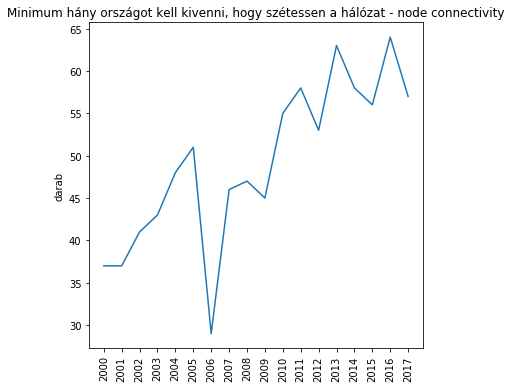

In [224]:
fig, axes = plt.subplots(figsize=(6,6))
axes.plot(glob_df['year'],glob_df['node connectivity'])
axes.set_xticks(glob_df['year'])
axes.set_title("Minimum hány országot kell kivenni, hogy szétessen a hálózat - node connectivity")
axes.set_ylabel("darab")
axes.set_xticklabels(glob_df['year'], rotation='vertical')
plt.show()

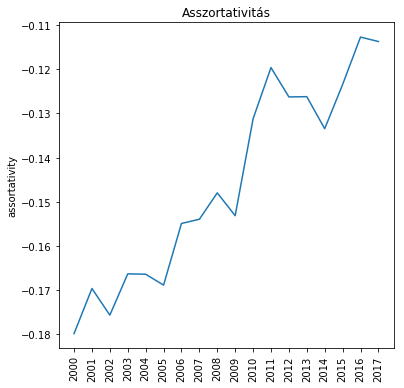

In [225]:
fig, axes = plt.subplots(figsize=(6,6))
axes.plot(glob_df['year'],glob_df['assortativity'])
axes.set_xticks(glob_df['year'])
axes.set_title("Asszortativitás")
axes.set_ylabel("assortativity")
axes.set_xticklabels(glob_df['year'], rotation='vertical')
plt.show()

In [32]:
glob_df.to_csv('global_properties.csv', index=False)

--------------------------

# Herfindalh

In [226]:
edgeframes=[edges2000,edges2001,edges2002,edges2003,edges2004,edges2005,edges2006,edges2007,
            edges2008,edges2009,edges2010,edges2011,edges2012,edges2013,edges2014,edges2015,
           edges2016,edges2017]

def herfindahl(edgeframes, years):
    herfi=pd.DataFrame()
    for i in range(len(years)):
        df1=edgeframes[i].groupby(['source','target']).sum()
        df2=edgeframes[i].groupby(['source']).sum()
        df1=df1.merge(df2, left_index=True, right_index=True)
        df1['herfindahl_index']=(df1['weight_x']*100/df1['weight_y'])**2
        df1=df1.reset_index().groupby('source').sum().sort_values('herfindahl_index', 
                                                                      ascending=False).drop(columns=['weight_x',
                                                                                                     'weight_y'])
        df1['year']=years[i]
        
        herfi=herfi.append(df1)
    return herfi.reset_index()
    
herfindahl_df=herfindahl(edgeframes, years)

In [227]:
nodes_herf=nodes.merge(herfindahl_df, left_on=['iso3','year'], right_on=['source','year'], how='left').drop(columns='source')
nodes_herf.sort_values(['year','name'])

#nodes_herf.to_csv('data_herf.csv',index=False)

,id,x,y,shape,year,Degree,Betweenness centrality,Clustering_coef,index,iso3,name,gross_import,Trade_bn_usd,Import_bn_usd,Export_bn_usd,constantGDP_percapita,GINI,per_capita_GDP_growth,Trade_GDP,gov_expend_on_health_GDP,FDI_inflow_GDP,gov_expend_on_educ_GDP,secondary_educ_gross_enrollment,natural_resource_rents_GDP,ICT_goods_export,RD_expenditures_GDP,domestic_credit_to_private_sector_GDP,Population,Population_growth,life_expectancy,Region Name,Sub-region Name,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,WTO,log_Gdp,herfindahl_index
0,2,0.5560,0.7286,0.5000,2000,1352823,0.072469,0.000045,AL,ALB,Albania,1.067358e+06,1.352823,1.067358,0.285465,2244.63,NaN,7.63,38.85,2.72,4.11,3.43,71.08,1.09,0.39,NaN,4.95,3089027.0,-0.64,73.96,Europe,Southern Europe,0,0,0,1.0,1,7.716296,2121.201644
1,44,0.5046,0.6557,0.5000,2000,26886980,0.231627,0.000422,DZ,DZA,Algeria,9.004983e+06,26.886980,9.004983,17.881997,3557.58,NaN,2.40,56.95,2.51,0.51,NaN,65.12,24.31,0.01,NaN,5.97,31042235.0,1.36,70.64,Africa,Northern Africa,0,0,0,0.0,0,8.176836,972.470303
2,4,0.3233,0.2866,0.5000,2000,48031655,0.000000,0.000538,AR,ARG,Argentina,2.382710e+07,48.031655,23.827104,24.204551,8224.11,51.1,-1.87,18.12,4.63,3.67,4.58,95.94,2.42,0.36,0.44,23.89,36870787.0,1.10,73.58,Americas,Latin America and the Caribbean,0,0,0,0.0,1,9.014825,1295.192282
3,5,0.6251,0.7226,0.5000,2000,916316,0.097948,0.000052,AM,ARM,Armenia,6.956430e+05,0.916316,0.695643,0.220673,1404.32,NaN,6.57,61.52,0.95,5.45,2.77,92.15,0.36,0.36,0.19,9.95,3069591.0,-0.63,71.41,Asia,Western Asia,0,1,0,0.0,1,7.247308,934.853899
4,7,0.8716,0.3596,0.5000,2000,121525721,0.000000,0.000977,AU,AUS,Australia,6.360372e+07,121.525721,63.603719,57.922002,44334.39,NaN,2.70,32.61,5.21,3.59,4.89,NaN,3.26,2.85,1.58,87.74,19153000.0,1.19,79.23,Oceania,Australia and New Zealand,0,0,0,1.0,1,10.699516,941.827839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,152,0.5866,0.7688,0.5000,2017,90698726,0.000000,0.000546,UA,UKR,Ukraine,4.659894e+07,90.698726,46.598943,44.099783,2994.52,26.0,2.92,82.78,3.08,2.52,5.41,NaN,4.00,0.93,0.45,38.27,44831135.0,-0.39,71.78,Europe,Eastern Europe,0,0,0,1.0,1,8.004539,702.785899
1760,55,0.4905,0.8077,0.5000,2017,965531044,0.000000,0.002709,GB,GBR,United Kingdom,5.951660e+08,965.531044,595.166034,370.365010,43010.71,NaN,1.20,40.58,7.65,4.55,NaN,125.85,0.44,4.25,1.66,133.97,66058859.0,0.68,81.26,Europe,Northern Europe,0,0,0,1.0,0,10.669204,102.630319
1761,154,0.2341,0.7061,0.5000,2017,3489675976,0.000000,0.005472,US,USA,United States,2.148229e+09,3489.675976,2148.228731,1341.447245,53382.76,NaN,1.57,20.30,8.56,1.82,NaN,98.95,0.47,9.49,2.79,190.58,324985539.0,0.63,78.54,Americas,Northern America,0,0,0,1.0,0,10.885243,11.677935
1762,153,0.3451,0.3193,0.5000,2017,17604339,0.000000,0.000177,UY,URY,Uruguay,8.051036e+06,17.604339,8.051036,9.553303,14437.38,39.5,2.22,28.94,6.58,4.70,4.84,120.22,1.65,0.13,0.48,26.13,3436646.0,0.36,77.63,Americas,Latin America and the Caribbean,0,0,0,0.0,1,9.577576,1215.513801


In [51]:
def custom_plot(ax,ay,nodes,X,Y,cim):
    nodes=nodes[nodes['year']==cim]
    sns.regplot(nodes[X], nodes[Y], ax=axes[ax,ay], truncate=True)
    #axes[ax,ay].scatter(nodes[X], nodes[Y], color='b')
    axes[ax,ay].set_title(cim)
    axes[ax,ay].set_ylabel(Y)
    axes[ax,ay].set_xlabel(X)
    #axes[ax,ay].set_xscale("log")
    #axes[ax,ay].set_yscale("log")
    
def custom_plot2(ax,ay,nodes,X,Y,cim):
    nodes=nodes[nodes['year']==cim]
    sns.regplot(nodes[X], nodes[Y], ax=axes[ax,ay], truncate=True)
    #axes[ax,ay].scatter(nodes[X], nodes[Y], color='b')
    axes[ax,ay].set_title(cim)
    axes[ax,ay].set_ylabel(Y)
    axes[ax,ay].set_xlabel(X)
    axes[ax,ay].set_xscale("log")
    axes[ax,ay].set_yscale("log")

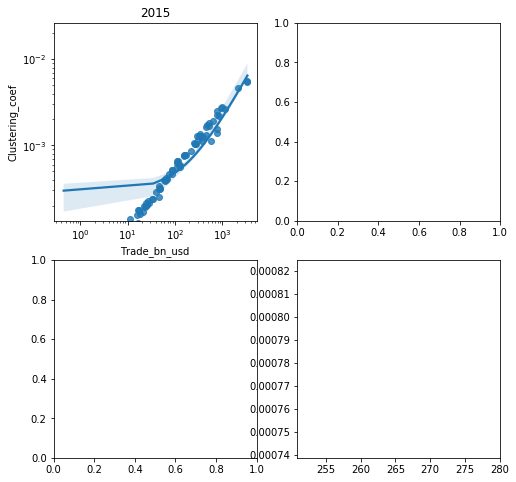

In [146]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
custom_plot2(0,0,nodes4,"Trade_bn_usd","Clustering_coef",2015)


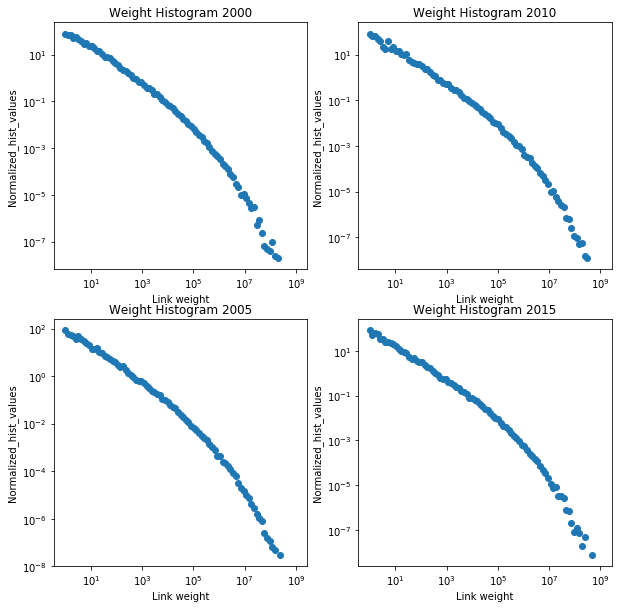

In [147]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
def logbinplot(ax,ay,edge,cim):
    bins = np.logspace(0,9.1, 90)
    widths = (bins[1:] - bins[:-1])
    hist = np.histogram(edge["weight"], bins=bins)
    hist_norm = hist[0]/widths
    axes[ax,ay].set_title("Weight Histogram %s" %cim)
    axes[ax,ay].set_ylabel("Normalized_hist_values")
    axes[ax,ay].set_xlabel("Link weight")
    axes[ax,ay].plot(bins[:-1], hist_norm, "o")
    axes[ax,ay].set_xscale('log')
    axes[ax,ay].set_yscale('log')
    
logbinplot(0,0,edges2000,2000)
logbinplot(1,0,edges2005,2005)
logbinplot(0,1,edges2010,2010)
logbinplot(1,1,edges2015,2015)



c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


2000  Fejlett degree exponent:  1.89


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


2000  Fejlődő degree exponent:  2.12
2005  Fejlett degree exponent:  1.83
2005  Fejlődő degree exponent:  2.05
2010  Fejlett degree exponent:  1.8
2010  Fejlődő degree exponent:  1.98
2015  Fejlett degree exponent:  1.8
2015  Fejlődő degree exponent:  1.96


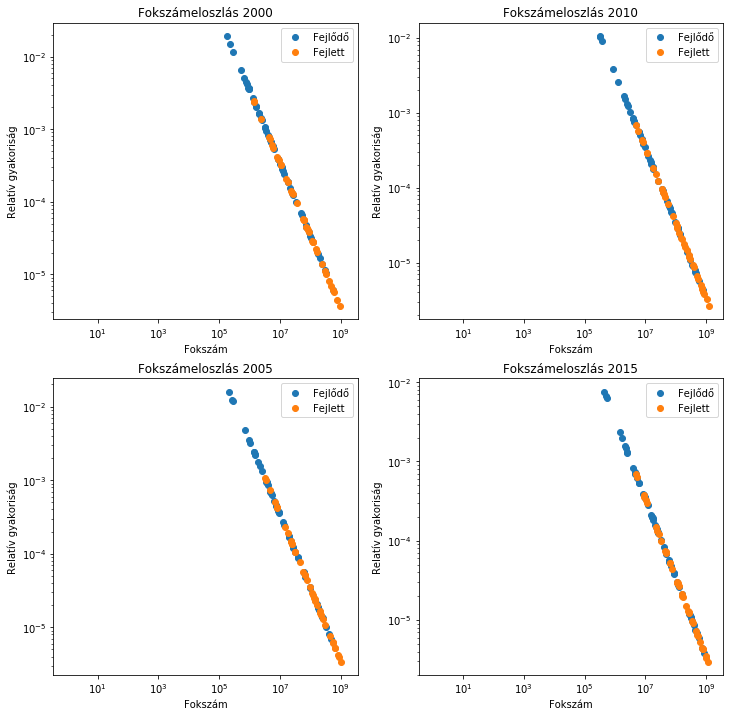

In [141]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
def logbinplot2(ax,ay,edge,cim):
    bins = np.logspace(0,9.1,70000)
    widths = (bins[1:] - bins[:-1])
    df1=edge[edge['year']==cim]
    hist1 = np.histogram(df1[df1['Developed / Developing Countries']==1]['Degree'], bins=bins)
    hist_norm1 = hist1[0]/widths
    
    hist2 = np.histogram(df1[df1['Developed / Developing Countries']==0]['Degree'], bins=bins)
    hist_norm2 = hist2[0]/widths
    
    axes[ax,ay].set_title("Fokszámeloszlás %s" %cim)
    axes[ax,ay].set_ylabel("Relatív gyakoriság")
    axes[ax,ay].set_xlabel("Fokszám")
    axes[ax,ay].plot(bins[:-1], hist_norm2, "o")
    axes[ax,ay].plot(bins[:-1], hist_norm1, "o")
    axes[ax,ay].legend(['Fejlődő', 'Fejlett'])
    axes[ax,ay].set_xscale('log')
    axes[ax,ay].set_yscale('log')

    val0=np.log(bins[:-1])/np.log(hist_norm1)
    val0=val0[val0<0]
    print(cim, " Fejlett degree exponent: ",round(-val0.mean(),2))

    val=np.log(bins[:-1])/np.log(hist_norm2)
    val=val[val<0]
    print(cim, " Fejlődő degree exponent: ",round(-val.mean(),2))

    
logbinplot2(0,0,nodes4,2000)
logbinplot2(1,0,nodes4,2005)
logbinplot2(0,1,nodes4,2010)
logbinplot2(1,1,nodes4,2015)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


2000  Fejlett degree exponent:  6.53


c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


2000  Fejlődő degree exponent:  45.53
2005  Fejlett degree exponent:  6.94
2005  Fejlődő degree exponent:  36.6
2010  Fejlett degree exponent:  14.25
2010  Fejlődő degree exponent:  14.76
2015  Fejlett degree exponent:  6.48
2015  Fejlődő degree exponent:  13.24


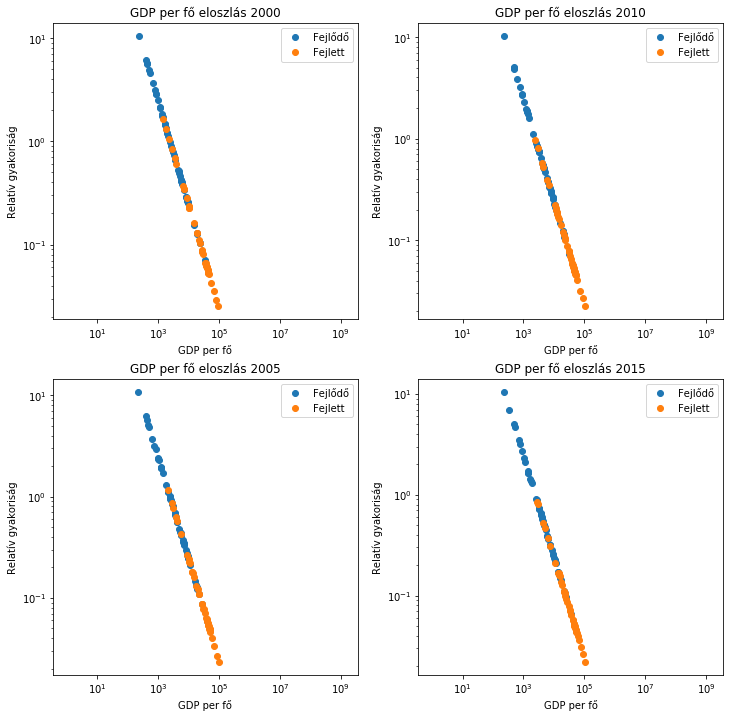

In [142]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
def logbinplot3(ax,ay,edge,cim):
    bins = np.logspace(0,9.1,50000)
    widths = (bins[1:] - bins[:-1])
    df1=edge[edge['year']==cim]
    hist1 = np.histogram(df1[df1['Developed / Developing Countries']==1]['constantGDP_percapita'], bins=bins)
    hist_norm1 = hist1[0]/widths
    
    hist2 = np.histogram(df1[df1['Developed / Developing Countries']==0]['constantGDP_percapita'], bins=bins)
    hist_norm2 = hist2[0]/widths
    
    axes[ax,ay].set_title("GDP per fő eloszlás %s" %cim)
    axes[ax,ay].set_ylabel("Relatív gyakoriság")
    axes[ax,ay].set_xlabel("GDP per fő")
    axes[ax,ay].plot(bins[:-1], hist_norm2, "o")
    axes[ax,ay].plot(bins[:-1], hist_norm1, "o")
    axes[ax,ay].legend(['Fejlődő', 'Fejlett'])
    axes[ax,ay].set_xscale('log')
    axes[ax,ay].set_yscale('log')
    
    val0=np.log(bins[:-1])/np.log(hist_norm1)
    val0=val0[val0<0]
    print(cim, " Fejlett degree exponent: ",round(-val0.mean(),2))

    val=np.log(bins[:-1])/np.log(hist_norm2)
    val=val[val<0]
    print(cim, " Fejlődő degree exponent: ",round(-val.mean(),2))

    
logbinplot3(0,0,nodes4,2000)
logbinplot3(1,0,nodes4,2005)
logbinplot3(0,1,nodes4,2010)
logbinplot3(1,1,nodes4,2015)

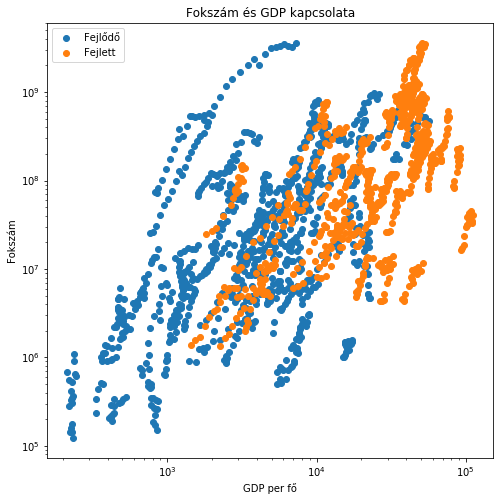

In [117]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_title("Fokszám és GDP kapcsolata")
axes.set_ylabel("Fokszám")
axes.set_xlabel("GDP per fő")
axes.plot(nodes4[nodes4['Developed / Developing Countries']==0]['constantGDP_percapita'], 
          nodes4[nodes4['Developed / Developing Countries']==0]['Degree'], "o")

axes.plot(nodes4[nodes4['Developed / Developing Countries']==1]['constantGDP_percapita'], 
          nodes4[nodes4['Developed / Developing Countries']==1]['Degree'], "o")

axes.set_xscale('log')
axes.set_yscale('log')
axes.set_yscale('log')
axes.legend(['Fejlődő', 'Fejlett'])

plt.show()

In [150]:
#fig = plt.subplots(figsize=(14,14))
corrMatrix = nodes4.corr()
#sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [28]:
cor_target = abs(corrMatrix["log_Gdp"])
relevant_features = cor_target[cor_target>0.3]
relevant_df=pd.DataFrame(relevant_features.sort_values().drop(['gross_import','Degree','constantGDP_percapita','GINI',
                                                               'gov_expend_on_educ_GDP','Clustering_coef',
                                                               'secondary_educ_gross_enrollment','RD_expenditures_GDP']))
relevant_df

,log_Gdp
Pop_gr_MA,0.320759
Trade_bn_usd,0.345434
Trade_bn_usd_MA,0.351258
y,0.411058
Land Locked Developing Countries (LLDC),0.418859
clus_MA,0.462520
Least Developed Countries (LDC),0.591422
Developed / Developing Countries,0.638170
domestic_credit_to_private_sector_GDP,0.684807
gov_expend_on_health_GDP,0.740492


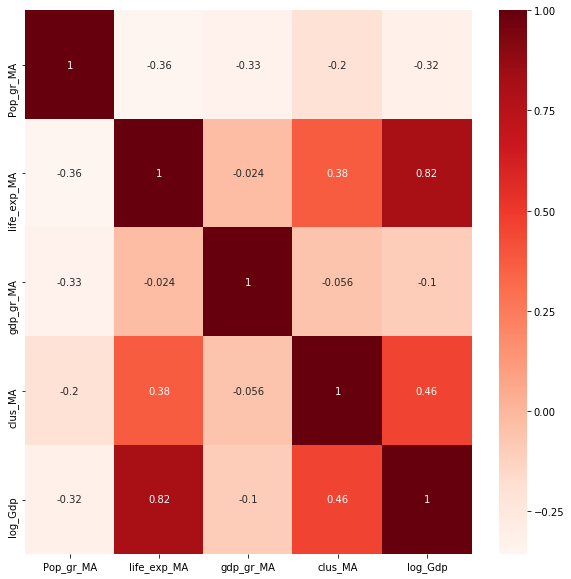

In [38]:
fig = plt.subplots(figsize=(10,10))
corrMatrix = nodes4.loc[:,[*['Pop_gr_MA','life_exp_MA','gdp_gr_MA','clus_MA','log_Gdp']]].corr()
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# sliding plotokhoz

In [229]:
sliding=nodes4[['year','name','gross_import']].sort_values(['year','gross_import'], ascending=False)
sliding1=sliding[sliding['year']==2000].iloc[:10,:]
sliding1['index']=range(1,11)
sliding2=sliding[sliding['year']==2005].iloc[:10,:]
sliding2['index']=range(1,11)
sliding3=sliding[sliding['year']==2010].iloc[:10,:]
sliding3['index']=range(1,11)
sliding4=sliding[sliding['year']==2015].iloc[:10,:]
sliding4['index']=range(1,11)

frames=[sliding1,sliding2,sliding3,sliding4]
sliding_df=pd.concat(frames, axis=0).reset_index(drop=True)
sliding_df['gross_import']=sliding_df['gross_import'].apply(lambda x: round(float(x),2)/1000000)

In [230]:
sliding_df

,year,name,gross_import,index
0,2000,United States,1042.586303,1
1,2000,Germany,409.501378,2
2,2000,United Kingdom,327.766513,3
3,2000,Japan,309.332294,4
4,2000,France,285.750327,5
5,2000,Canada,224.850242,6
6,2000,Italy,209.506871,7
7,2000,Hong Kong,192.588095,8
8,2000,China,176.031759,9
9,2000,Belgium,169.319482,10


In [35]:
el1=edges2000.groupby(['source','target']).sum().sort_values('weight', ascending=False).reset_index()[:10]
el1['year']=2000
el1['index']=range(1,11)
el1['name']=el1['source']+" - "+el1['target']

el2=edges2005.groupby(['source','target']).sum().sort_values('weight', ascending=False).reset_index()[:10]
el2['year']=2005
el2['index']=range(1,11)
el2['name']=el2['source']+" - "+el2['target']

el3=edges2010.groupby(['source','target']).sum().sort_values('weight', ascending=False).reset_index()[:10]
el3['year']=2010
el3['index']=range(1,11)
el3['name']=el3['source']+" - "+el3['target']

el4=edges2015.groupby(['source','target']).sum().sort_values('weight', ascending=False).reset_index()[:10]
el4['year']=2015
el4['index']=range(1,11)
el4['name']=el4['source']+" - "+el4['target']

frames=[el1,el2,el3,el4]
sliding_df2=pd.concat(frames, axis=0).reset_index(drop=True)
sliding_df2['weight']=sliding_df2['weight'].apply(lambda x: round(float(x),2)/1000000)
sliding_df2

,source,target,weight,year,index,name
0,USA,CAN,216.099263,2000,1,USA - CAN
1,CAN,USA,151.871541,2000,2,CAN - USA
2,USA,JPN,142.490843,2000,3,USA - JPN
3,USA,MEX,130.116830,2000,4,USA - MEX
4,MEX,USA,126.121941,2000,5,MEX - USA
5,USA,CHN,98.876818,2000,6,USA - CHN
6,HKG,CHN,91.729557,2000,7,HKG - CHN
7,JPN,USA,70.672625,2000,8,JPN - USA
8,USA,DEU,55.764372,2000,9,USA - DEU
9,JPN,CHN,54.663872,2000,10,JPN - CHN


In [232]:
sliding_df.to_csv('sliding.csv')
sliding_df2.to_csv('sliding2.csv')

# Beszámolóhoz ábrák, elemzések

In [4]:
nodes3=pd.read_csv('nodes3_data.csv')
nodes4=pd.read_csv('final_data.csv')
new_df=pd.read_csv('new_df.csv')
nodes=pd.read_csv('data.csv')
nodes1=pd.read_csv('data_corruption.csv')
nodes_herf=pd.read_csv('data_herf.csv')
global_df=pd.read_csv('global_properties.csv')

In [285]:
def networkplot(ax,ay,indicat):
    df=nodes4.groupby(['year','Developed / Developing Countries']).agg({'%s' %indicat:'mean'}).reset_index()
    if indicat=='clus_MA':
        df=df[df['year']>=2005]
    axes[ax,ay].plot(df[df['Developed / Developing Countries']==0]['year'],
                     df[df['Developed / Developing Countries']==0][indicat])
    axes[ax,ay].plot(df[df['Developed / Developing Countries']==1]['year'], 
                     df[df['Developed / Developing Countries']==1][indicat])
    axes[ax,ay].set_title(indicat+" average in the network by year")
    axes[ax,ay].set_ylabel("average of %s" %indicat)
    axes[ax,ay].set_xlabel("Year")
    axes[ax,ay].legend(['Developing', 'Developed'])
    axes[ax,ay].set_xticks(df['year'])
    axes[ax,ay].set_xticklabels(df['year'], rotation='vertical')
    

In [6]:
nodes.groupby(['year','Developed / Developing Countries']).agg({'constantGDP_percapita':'mean'}).reset_index().sort_values(['Developed / Developing Countries','year'])

,year,Developed / Developing Countries,constantGDP_percapita
0,2000,0.0,5608.640179
2,2001,0.0,5583.318036
4,2002,0.0,5624.288036
6,2003,0.0,5800.397143
8,2004,0.0,6060.218036
10,2005,0.0,6267.278393
12,2006,0.0,6563.793214
14,2007,0.0,6846.227857
16,2008,0.0,6990.574107
18,2009,0.0,6861.672321


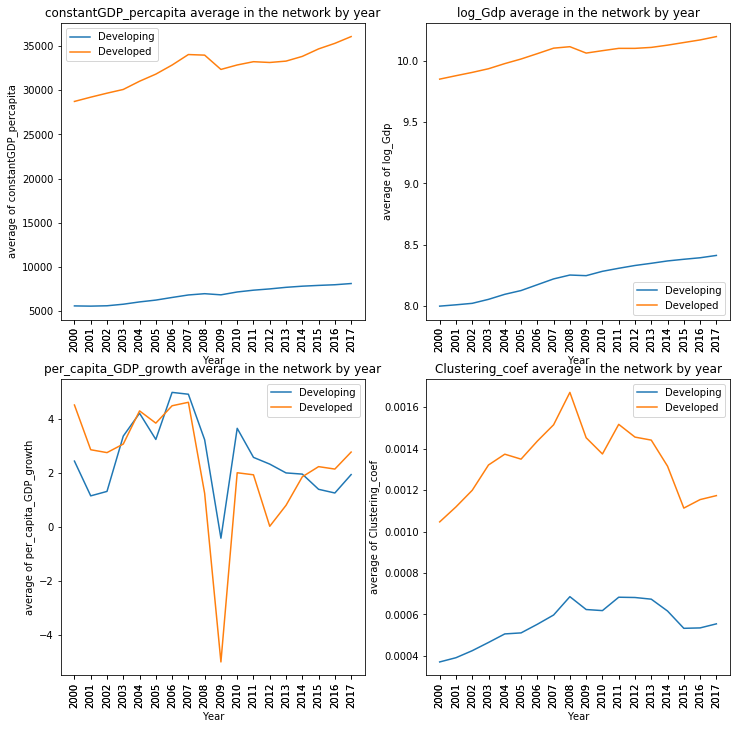

In [286]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
networkplot(0,0,'constantGDP_percapita')
networkplot(0,1,'log_Gdp')
networkplot(1,0,'per_capita_GDP_growth')
networkplot(1,1,'Clustering_coef')

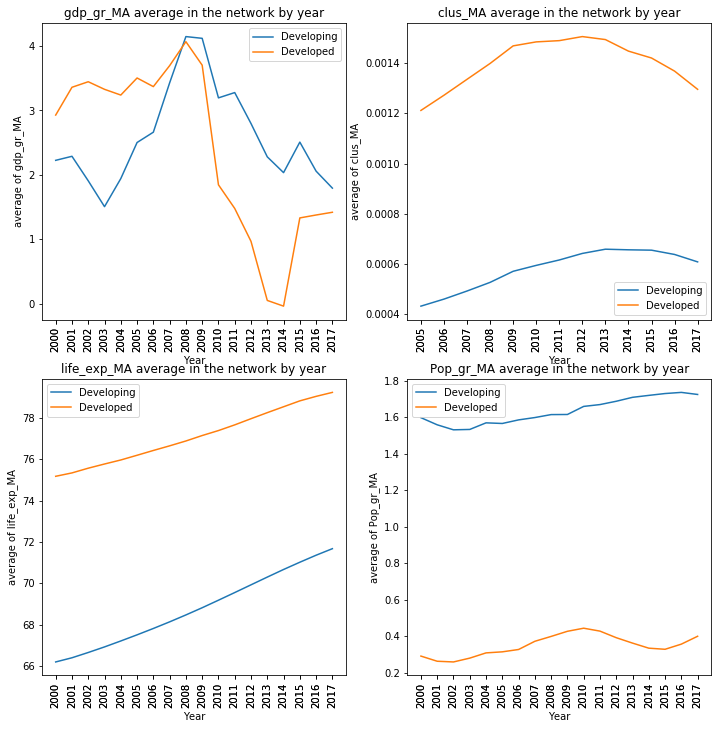

In [287]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
networkplot(0,0,'gdp_gr_MA')
networkplot(0,1,'clus_MA')
networkplot(1,0,'life_exp_MA')
networkplot(1,1,'Pop_gr_MA')

In [18]:
# Öko + plotolás

Trade network Backbone plotok

In [41]:
def plot_gen(edges):
    Y=nx.DiGraph()
    edges1=edges.groupby(['source']).agg({'weight':sum})
    edges2=edges.groupby('target').sum()
    edges1=edges1.merge(edges2, left_index=True, right_index=True, how='outer')
    edges1=edges1.fillna(0)
    edges1['weight']=edges1['weight_x']+edges1['weight_y']
    edges1=edges1.drop(columns=['weight_x','weight_y'])
    indexek=edges1.sort_values('weight', ascending=False).index[:10]
    
    edges=edges[edges['source'].isin(indexek)]
    edges=edges[edges['target'].isin(indexek)]

    #edges=edges.sort_values('weight',ascending=False)[:int(len(edges)/200)]
    Y=nx.from_pandas_edgelist(edges, 'source', 'target', ['weight'], nx.DiGraph())

    
    mask2=mask.merge(edges1, left_on='index', right_index=True, how='left')
    
    nx.set_node_attributes(Y, mask2.set_index('index').to_dict('index'))
    
    return Y

Z2000=plot_gen(edges2000)
Z2005=plot_gen(edges2005)
Z2010=plot_gen(edges2010)
Z2015=plot_gen(edges2015)
#Z2018=plot_gen(edges2018)


In [39]:
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=False,only_physics_buttons=False):
        from pyvis import network as net
        pyvis_graph = net.Network(notebook=notebook, height="1000px", width="100%",
                                  bgcolor="#222222", font_color="white", directed=True)
        #pyvis_graph.force_atlas_2based(gravity=-100, central_gravity=0.01, spring_length=150,
        #                               spring_strength=0.05, damping=0.5, overlap=0)
        for node,node_attrs in networkx_graph.nodes(data=True):
            pyvis_graph.add_node(node,**node_attrs, color="#dd4b39")    
        for source,target,edge_attrs in networkx_graph.edges(data=True):
            if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
                edge_attrs['value']=edge_attrs['weight']
            pyvis_graph.add_edge(source,target,**edge_attrs, arrowStrikethrough=False)
        neighbor_map=pyvis_graph.get_adj_list()
        for node in pyvis_graph.nodes:
            node["value"]=len(neighbor_map[node["id"]])
        pyvis_graph.toggle_physics(False)
        return pyvis_graph.show(output_filename)

def draw_graph(networkx_graph,notebook=True,output_filename='graph.html'):
    from pyvis import network as net
    pyvis_graph = net.Network(notebook=notebook, height="400px", width="100%",
                                bgcolor="#222222", font_color="white", directed=True)
    pyvis_graph.barnes_hut(gravity=-8000, central_gravity=0.3, spring_length=150,
                            spring_strength=0.05, damping=0.5, overlap=0)
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(node,x=node_attrs['x']*2000,y=-(node_attrs['y'])*2000,value=node_attrs['weight'], color="#dd4b39", physics=False)
        
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            edge_attrs['value']=edge_attrs['weight']
        pyvis_graph.add_edge(source,target,**edge_attrs, arrowStrikethrough=False)
    for node in pyvis_graph.nodes:
        pyvis_graph.toggle_physics(False)
    return pyvis_graph.show(output_filename)


In [42]:
draw_graph(Z2000)

In [83]:
draw_graph(Z2005)

In [84]:
draw_graph(Z2010)

In [85]:
draw_graph(Z2015)

In [63]:
draw_graph(Z2018)

NameError: name 'Z2018' is not defined

In [119]:
wbdata.search_indicators('public expenditure')

BI.WAG.TOTL.PB.ZS	Wage bill as a percentage of Public Expenditure
SE.XPD.EDUC.ZS   	Public Expenditure on Education  (% GDP)
SH.XPD.HLTH.ZS   	Public Expenditure on Health (% GDP)


Public expenditure, FDI, education level, private investment, capital labor ratio, natural resources, infrastructure, technology, law, human capital,
Foldrajzi valtozok (landlocked), WTO tagsag, atlagos iskolazottsag (human capital proxy), esetleg nyersanyag boseg



In [30]:
data_date=(datetime.datetime(2000, 1, 1))
len(wbdata.get_data('SP.POP.GROW', data_date=data_date))

264

In [21]:
nodes=nodes_gen(Y2000, 2000, nodess)
nodes=nodes_gen(Y2005, 2005, nodes)
nodes=nodes_gen(Y2010, 2010, nodes)
nodes=nodes_gen(Y2015, 2015, nodes)

In [95]:
nodes=nodes_gen(Y2000, 2000, nodess)
nodes=nodes_gen(Y2005, 2005, nodes)
nodes=nodes_gen(Y2010, 2010, nodes)
nodes=nodes_gen(Y2015, 2015, nodes)
input_countries=nodes.index
input_countries=pd.DataFrame(input_countries, columns=["Countries"])

iso2=[]
iso3=[]
count=[]
countries = {}
for country in pycountry.countries:
    iso2.append(country.alpha_2)
    iso3.append(country.alpha_3)
    count.append(country.name)
    
countries=pd.DataFrame(iso3,iso2, columns=["iso3"]).reset_index()
countries["name"]=count
nodes=nodes.merge(countries,left_index=True, right_on="iso3",how='left')


def wbadat(times, tab, indicat, name):
    indicator={indicat:name}
    tab2=pd.DataFrame()
    for i in times:
        data_date = (datetime.datetime(i, 1, 1))
        try:
            population=wbdata.get_data(indicat, data_date=data_date)
            population=pd.DataFrame(population).drop(columns=['decimal','indicator','date'])
            population['index']=[f['id'] for f in population['country']]
            population=population.drop(columns=["country"])
            population=population.dropna()
            population['value']=round(population['value'].astype(float),2)
            population=population.rename(columns={"value":name})
            
            tab1=tab.merge(population, left_on=["index"], right_on=["index"], how="left")
            
            tab1=tab1[tab1['year']==i]
            if i==2000:
                tab2=tab1
            else:
                frames=[tab1,tab2]
                tab2=pd.concat(frames, axis=0)

        except:
            'foo'        
    return tab2

dates=[2000,2005,2010,2015]


nodes=wbadat(dates, nodes,'NY.GDP.PCAP.KD', "constantGDP_percapita")
nodes=wbadat(dates, nodes,'CC.PER.RNK', "corruption_index")
nodes=wbadat(dates, nodes,'SI.POV.GINI', "GINI")

nodes=nodes.sort_values(['year','name'])

,id,x,y,shape,year,Degree,Clustering coef,index,iso3,name,constantGDP_percapita,corruption_index,GINI
483,2,0.5560,0.7286,0.5000,2000,101,0.941584,AL,ALB,Albania,2244.63,23.86,NaN
574,44,0.5046,0.6557,0.5000,2000,141,0.805572,DZ,DZA,Algeria,3557.58,18.78,NaN
562,1,0.5496,0.4378,0.5000,2000,63,0.960573,AO,AGO,Angola,2195.63,1.52,52.0
625,6,0.3283,0.5948,0.5000,2000,97,0.932775,AG,ATG,Antigua and Barbuda,13184.91,82.23,NaN
485,4,0.3233,0.2866,0.5000,2000,146,0.821256,AR,ARG,Argentina,8224.11,50.25,51.1
486,5,0.6251,0.7226,0.5000,2000,91,0.941636,AM,ARM,Armenia,1404.32,27.41,NaN
487,7,0.8716,0.3596,0.5000,2000,157,0.761146,AU,AUS,Australia,44334.39,93.91,NaN
488,8,0.5404,0.7640,0.5000,2000,160,0.744340,AT,AUT,Austria,42001.21,92.89,28.8
489,9,0.6322,0.7230,0.5000,2000,103,0.911289,AZ,AZE,Azerbaijan,1658.81,4.57,NaN
566,17,0.2850,0.6391,0.5000,2000,111,0.912367,BS,BHS,Bahamas,31570.53,86.80,NaN


In [ ]:
def gdp(row):
    if row['year']==2000:
        val=row['constantGDP_percapita2000']
    elif row['year']==2005:
        val=row['constantGDP_percapita2005']
    elif row['year']==2010:
        val=row['constantGDP_percapita2010']
    elif row['year']==2015:
        val=row['constantGDP_percapita2015']
    return val    

def corruption(row):
    if row['year']==2000:
        val=row['corruption_index2000']
    elif row['year']==2005:
        val=row['corruption_index2005']
    elif row['year']==2010:
        val=row['corruption_index2010']
    elif row['year']==2015:
        val=row['corruption_index2000']
    return val    

def Gini(row):
    if row['year']==2000:
        val=row['GINI2000']
    elif row['year']==2005:
        val=row['GINI2005']
    elif row['year']==2010:
        val=row['GINI2010']
    elif row['year']==2015:
        val=row['GINI2015']
    return val    

def HDI(row):
    if row['year']==2000:
        val=row['HDI2000']
    elif row['year']==2005:
        val=row['HDI2005']
    elif row['year']==2010:
        val=row['HDI2010']
    else:
        val=np.nan
    return val    

nodes['GDP_percap']=nodes.apply(gdp, axis=1)
nodes['corruption']=nodes.apply(corruption, axis=1)
nodes['GINI']=nodes.apply(Gini, axis=1)
nodes['HDI']=nodes.apply(HDI, axis=1)
dropcols=nodes.iloc[:,10:25].columns
nodes=nodes.drop(columns=dropcols)

In [ ]:
gross2000=edges2000.groupby('source').sum().rename(columns={'weight':'gross import'})
gross2005=edges2005.groupby('source').sum().rename(columns={'weight':'gross import'})
gross2010=edges2010.groupby('source').sum().rename(columns={'weight':'gross import'})
gross2015=edges2015.groupby('source').sum().rename(columns={'weight':'gross import'})
#gross2018=edges2018.groupby('source').sum()

imp00=nodes.merge(gross2000, left_on='iso3', right_index=True, how='left')
imp00=imp00[imp00['year']==2000]
imp05=nodes.merge(gross2005, left_on='iso3', right_index=True, how='left')
imp05=imp05[imp05['year']==2005]
imp10=nodes.merge(gross2010, left_on='iso3', right_index=True, how='left')
imp10=imp10[imp10['year']==2010]
imp15=nodes.merge(gross2015, left_on='iso3', right_index=True, how='left')
imp15=imp15[imp15['year']==2015]
nodes=pd.concat([imp00,imp05,imp10,imp15], axis=0)
nodes=nodes.sort_values(['year','name'])
nodes

In [460]:
'''Y=nx.Graph()
edges=edges2000.sort_values('weight',ascending=False)[:int(len(edges2000)/200)]
Y=nx.from_pandas_edgelist(edges, 'source', 'target', ['weight'])

nx.set_node_attributes(Y, mask.set_index('index').to_dict('index'))
Y.nodes(data=True)
edges1=edges.groupby(['source']).agg({'weight':sum})
edges2=edges.groupby('target').sum()
#mask.merge(edges.groupby('source').sum(), left_on='index', right_index=True)
edges1=edges1.merge(edges2, left_index=True, right_index=True, how='outer')
edges1=edges1.fillna(0)
edges1['weight']=edges1['weight_x']+edges1['weight_y']
edges1=edges1.drop(columns=['weight_x','weight_y'])
edges1.sort_values('weight')'''

"Y=nx.Graph()\nedges=edges2000.sort_values('weight',ascending=False)[:int(len(edges2000)/200)]\nY=nx.from_pandas_edgelist(edges, 'source', 'target', ['weight'])\n\nnx.set_node_attributes(Y, mask.set_index('index').to_dict('index'))\nY.nodes(data=True)\nedges1=edges.groupby(['source']).agg({'weight':sum})\nedges2=edges.groupby('target').sum()\n#mask.merge(edges.groupby('source').sum(), left_on='index', right_index=True)\nedges1=edges1.merge(edges2, left_index=True, right_index=True, how='outer')\nedges1=edges1.fillna(0)\nedges1['weight']=edges1['weight_x']+edges1['weight_y']\nedges1=edges1.drop(columns=['weight_x','weight_y'])\nedges1.sort_values('weight')"